<a href="https://colab.research.google.com/github/IzaLech/data-scientist-bootcamp/blob/main/DataFrame_filtrowanie_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as np

def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1045 entries, 2023-07-05 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1045 non-null   float64
 1   High    1045 non-null   float64
 2   Low     1045 non-null   float64
 3   Close   1045 non-null   float64
 4   Volume  1045 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 49.0 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,43.17,43.4000,42.58,43.09,7578076
2023-06-30,43.11,43.4299,42.92,43.17,17589240
2023-06-29,44.09,44.2800,42.11,42.58,28595285
2023-06-28,43.50,45.2400,43.32,44.24,28187374
2023-06-27,44.69,44.8300,43.75,43.83,29652066


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1044.000000,1044.000000,1044.000000,1044.000000,1.044000e+03
mean,37.102076,37.856619,36.291085,37.077011,2.539654e+07
std,9.436280,9.512807,9.287566,9.380333,1.630626e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.247500,30.889975,29.558475,30.267500,1.594760e+07
50%,34.745000,35.305850,33.930000,34.680000,2.167306e+07
75%,43.562500,44.282500,42.820025,43.467500,3.021246e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df['Average'] = (df.Open + df.Close) / 2
df.head(3)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-07-03,43.17,43.4000,42.58,43.09,7578076,43.130
2023-06-30,43.11,43.4299,42.92,43.17,17589240,43.140
2023-06-29,44.09,44.2800,42.11,42.58,28595285,43.335


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


przesuwamy wartości ceny Close o 1 wiersz w dół

In [ ]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2023-06-27,44.42
2023-06-28,43.83
2023-06-29,44.24


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


 dzienna zmiana ceny Close wyrażona w procentach czyli liczymy wartość różnicy w stosunku do starej ceny
 przykład: stara cena (dzień poprzedni) to 41,57
 różnica w stosunku do nowej ceny to -4,47
 co stanowi -0,10752 tej ceny czyli -10,752 %
 czyli akcje potaniały o 10 %

In [ ]:
df['Daily_change'] = df.Close / df.Close_shift - 1
df.head(10)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.50,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df['Daily_change'].min()

-0.21628767847699626

In [ ]:
df.Daily_change.max()

0.3825910931174088

<Axes: >

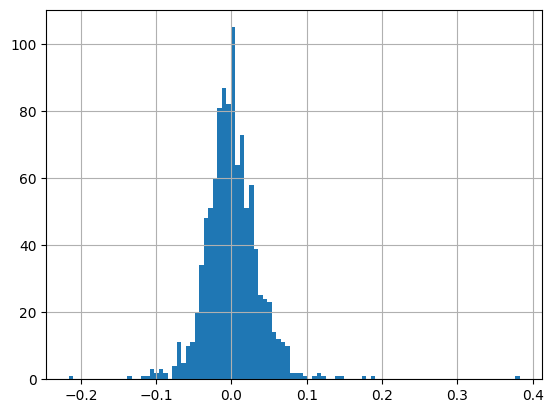

In [ ]:
df.Daily_change.hist(bins=100)

<Axes: xlabel='Date'>

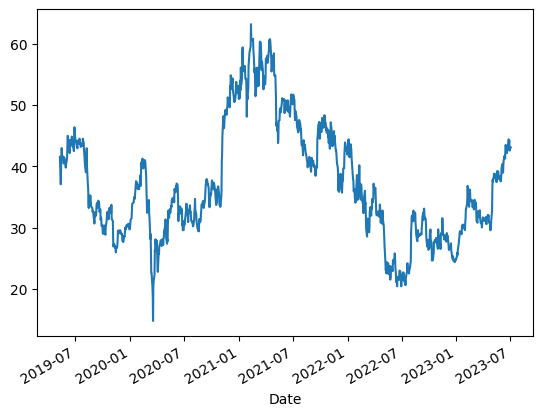

In [ ]:
df.Close.plot()

In [ ]:
df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.5100,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.5700,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2023-06-22,42.30,43.8700,42.21,42.81,19542077,42.555,42.66,0.003516
2023-06-23,42.59,43.7550,42.33,43.34,23186640,42.965,42.81,0.012380
2023-06-26,43.75,45.0400,43.68,44.42,33692974,44.085,43.34,0.024919


In [ ]:
df_positive['Daily_change'].mean()

0.027383318800598674

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-06-27    False
2023-06-28    False
2023-06-29    False
2023-06-30    False
2023-07-03    False
Length: 1044, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [ ]:
df.index > '2021-10-10'

array([False, False, False, ...,  True,  True,  True])

In [ ]:
df[df.index > '2021-10-10']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2021-10-11,47.70,47.8700,46.280,46.29,16336783,46.995,47.77,-0.030982
2021-10-12,46.33,47.0500,46.155,46.72,12404189,46.525,46.29,0.009289
2021-10-13,46.26,47.0000,45.940,46.41,13754404,46.335,46.72,-0.006635
2021-10-14,46.98,47.9400,46.840,47.28,18514016,47.130,46.41,0.018746
2021-10-15,47.91,48.8400,47.340,48.36,20581670,48.135,47.28,0.022843
...,...,...,...,...,...,...,...,...
2023-06-27,44.69,44.8300,43.750,43.83,29652066,44.260,44.42,-0.013282
2023-06-28,43.50,45.2400,43.320,44.24,28187374,43.870,43.83,0.009354
2023-06-29,44.09,44.2800,42.110,42.58,28595285,43.335,44.24,-0.037523


In [3]:
df[(df.index >= '2021-10-10') & (df.index < '2021-10-30')]

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-29,44.49,44.8000,43.5700,43.82,18283203
2021-10-28,45.00,45.4117,44.3833,44.62,14768789
2021-10-27,46.47,46.5500,44.1650,44.73,26999752
2021-10-26,46.28,47.6900,45.8600,46.02,19491761
2021-10-25,45.67,46.0700,45.0173,45.72,12955477
2021-10-22,46.00,46.5000,45.2300,45.51,19259203
2021-10-21,45.97,47.5400,45.5200,46.47,15741030
2021-10-20,47.15,47.5400,45.9300,46.00,15570862
2021-10-19,47.20,47.6900,46.7400,47.05,16500199


In [6]:
df[(df.index == '2021-10-11') | (df.index == '2021-10-28')]

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-28,45.0,45.4117,44.3833,44.62,14768789
2021-10-11,47.7,47.8700,46.2800,46.29,16336783


In [7]:
df.index.month ==5

array([False, False, False, ...,  True,  True,  True])

In [8]:
df[df.index.month ==5]

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-31,37.25,38.050,37.070,37.93,34506306
2023-05-30,38.73,39.060,37.560,37.56,18143192
2023-05-26,38.24,38.760,38.220,38.45,14438769
2023-05-25,38.48,38.585,37.525,37.95,18634222
2023-05-24,38.05,38.660,37.770,37.96,22074721
...,...,...,...,...,...
2019-05-16,41.48,44.060,41.250,43.00,38115524
2019-05-15,39.37,41.880,38.950,41.29,36086065
2019-05-14,38.31,39.960,36.850,39.96,46661147


In [9]:
df[df.index.year ==2019]

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,29.11,29.95,28.90,29.74,16233064
2019-12-30,30.13,30.20,29.35,29.74,18812846
2019-12-27,30.80,31.06,30.17,30.17,18465965
2019-12-26,30.47,30.79,30.03,30.67,22224500
2019-12-24,30.33,30.84,30.11,30.44,12938593
...,...,...,...,...,...
2019-05-16,41.48,44.06,41.25,43.00,38115524
2019-05-15,39.37,41.88,38.95,41.29,36086065
2019-05-14,38.31,39.96,36.85,39.96,46661147


In [11]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-01,37.500,38.5000,37.2650,38.48,17115298
2023-05-01,32.000,33.0000,31.7600,32.74,49867118
2023-03-01,33.430,33.5800,32.8900,32.99,14404671
2023-02-01,30.880,31.8500,30.6400,31.49,21206352
2022-12-01,29.220,29.6000,28.3000,28.34,18066596
2022-11-01,30.070,30.9999,29.1200,29.75,87994014
2022-09-01,28.170,28.9500,27.6900,28.92,17828091
2022-08-01,23.430,24.6200,22.8850,24.60,46960678
2022-07-01,20.700,21.3700,20.4300,21.34,20693312
